## Titanic survival predictions

This is Titanic competiton example taken from kaggle site [here](https://www.kaggle.com/c/titanic)

### Import necessary libraries

In [84]:
import pandas as pd
import numpy as np

#visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Read and explore data

In [85]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [86]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hood, Mr. Ambrose Jr",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Data Analysis

In [88]:
print (train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [89]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Numerical Features:** Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)

**Categorical Features:** Survived, Sex, Embarked, Pclass

**Alphanumeric Features:** Ticket, Cabin

In [90]:
train.shape, test.shape

((891, 12), (418, 11))

In [91]:
##missing vvalues

print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Data visualisation

visulising each of the features

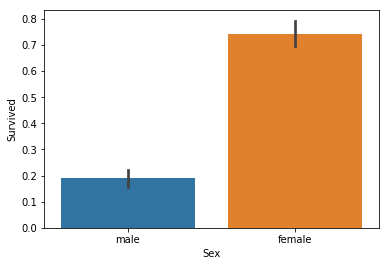

In [92]:
sns.barplot(x='Sex', y='Survived', data=train)


females have much higher chance of surviving than males

### Pclass feature

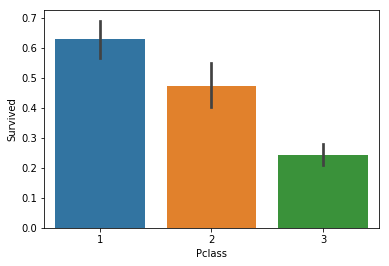

In [93]:
sns.barplot(x='Pclass', y='Survived', data=train)

people of higher class have more survivng chance (62.9% vs 47.3% vs 24.2%)

### SibSp feature

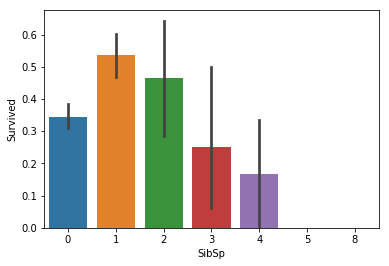

In [94]:
sns.barplot(x='SibSp', y='Survived', data=train)

people with more siblings or spouses are less likely to survive and also that of no siblings or spouses.
but with that of one or two siblings are more likely to survive

### Parch feature

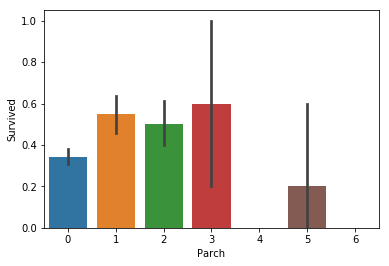

In [95]:
sns.barplot(x='Parch', y='Survived', data=train)

people with morethan 3 parents and childres are less likely to survive

### Age feature

fill the missing values of age, and consider them as unknown group. divide the ages into certain groups.

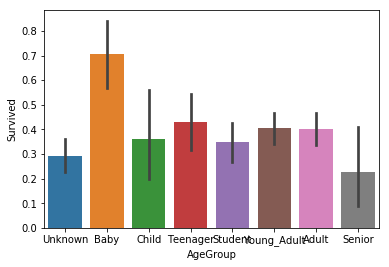

In [96]:
#fill values
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young_Adult', 'Adult', 'Senior']

train['AgeGroup'] = pd.cut(train['Age'], bins, labels= labels)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels = labels)

sns.barplot(x='AgeGroup', y='Survived', data=train)

this concludes that Babies are more likely to survive.

### cabin feature

In [97]:
train['Cabin'].value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
E101               3
F2                 3
C22 C26            3
D                  3
F33                3
B58 B60            2
F4                 2
C125               2
B22                2
B20                2
D35                2
B49                2
C123               2
E25                2
E67                2
D33                2
F G73              2
E24                2
B18                2
B57 B59 B63 B66    2
C92                2
C83                2
C78                2
B35                2
B77                2
D26                2
B5                 2
                  ..
D19                1
A7                 1
A10                1
A19                1
C148               1
C118               1
C99                1
A24                1
C47                1
C50                1
D46                1
C111               1
E46                1
D6                 1
B42                1
D11                1
C106         

In [98]:
train['CabinBool'] = (train['Cabin'].notnull().astype('int'))
test['CabinBool'] = (test['Cabin'].notnull().astype('int'))

train['CabinBool'].value_counts()

0    687
1    204
Name: CabinBool, dtype: int64

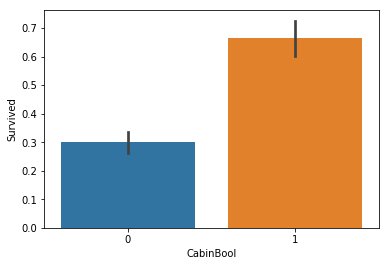

In [99]:
sns.barplot(x='CabinBool', y='Survived', data=train)

people with recorded cabin numbers are more likely to survive

## Cleaning data

filling missing values and imputing outliers

### Looking at the test data

In [100]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Danbom, Master. Gilbert Sigvard Emanuel",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young_Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


In [101]:
test.shape

(418, 13)

**lets look at the each feature**

### Cabin feature

In [102]:
#we can drop this, because we dont have much useful info in this

train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)

### Ticket feature

In [103]:
## we can also drop this one too
train = train.drop('Ticket', axis=1)
test = test.drop('Ticket', axis=1)

### Embarked feature

In [104]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

we can see that most of them are of Southampton(S). just fill the missing values with S

In [105]:
train = train.fillna({'Embarked':'S'})

### Age feature

In [106]:
# create a combined dataset
combine = [train, test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [107]:
#replace various titles with common names

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace([ 'Capt', 'Col','Don', 'Dr', 'Major', 
                                                 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.250000
5,Royal,1.000000


In [108]:
#map each of the titles to numerics

for dataset in combine:
    dataset['Title'] = dataset['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6})
    dataset['Title'] = dataset['Title'].fillna(0)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young_Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young_Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young_Adult,0,1


In [109]:
print(train['Age'].isnull().sum())

0


In [110]:
print(train['Title'].isnull().sum())

0


In [111]:
print(train['AgeGroup'].isnull().sum())

0


In [112]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young_Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,4.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,6.0,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,5.0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,5.0,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,5.0,0,1


In [113]:
train = train.drop('Age', axis=1)
test = test.drop('Age', axis=1)

### Name feature

In [114]:
train = train.drop('Name', axis=1)
test = test.drop('Name', axis=1)

### Sex feature

In [115]:
sex_mapping = {'male': 0, 'female': 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


### Embarked feature

In [116]:
embark_map = {'S':1, 'C':2, 'Q':3}
train['Embarked'] = train['Embarked'].map(embark_map)
test['Embarked'] = test['Embarked'].map(embark_map)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


In [117]:
print(train['Fare'].isnull().sum())

0


In [118]:
print(test['Fare'].isnull().sum())

1


In [119]:
len(test['Fare'])

418

In [120]:
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [121]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [122]:
print(test['Fare'].isnull().sum())

0


In [123]:
test['Fare'].describe()

count    418.000000
mean      35.627188
std       55.840500
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [124]:
#map the fare into bands
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

In [125]:
#drop the fare columns
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [126]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


In [127]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5.0,0,1,1
1,893,3,1,1,0,1,6.0,0,3,1
2,894,2,0,0,0,3,7.0,0,1,2
3,895,3,0,0,0,1,5.0,0,1,2
4,896,3,1,1,1,1,4.0,0,3,2


In [129]:
for i in test.columns:
    print ('missing counts %s' %i)
    print (test[i].isnull().sum())

missing counts PassengerId
0
missing counts Pclass
0
missing counts Sex
0
missing counts SibSp
0
missing counts Parch
0
missing counts Embarked
0
missing counts AgeGroup
86
missing counts CabinBool
0
missing counts Title
0
missing counts FareBand
0


In [130]:
test['AgeGroup'].describe()

count    332.000000
mean       4.680723
std        1.353251
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: AgeGroup, dtype: float64

In [131]:
test['AgeGroup'].value_counts()

5.0    96
6.0    94
4.0    77
3.0    29
2.0    13
1.0    12
7.0    11
Name: AgeGroup, dtype: int64

In [132]:
test['AgeGroup'] = test['AgeGroup'].fillna(method='bfill')

In [133]:
test['AgeGroup'].value_counts()

6.0    119
5.0    119
4.0     92
3.0     38
1.0     18
2.0     17
7.0     13
Name: AgeGroup, dtype: int64

In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Embarked       891 non-null int64
AgeGroup       714 non-null float64
CabinBool      891 non-null int64
Title          891 non-null int64
FareBand       891 non-null category
dtypes: category(1), float64(1), int64(9)
memory usage: 70.7 KB


In [138]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Embarked       418 non-null int64
AgeGroup       416 non-null float64
CabinBool      418 non-null int64
Title          418 non-null int64
FareBand       418 non-null category
dtypes: category(1), float64(1), int64(8)
memory usage: 30.1 KB


In [139]:
for i in train.columns:
    print ('missing %s' %i)
    print (train[i].isnull().sum())

missing PassengerId
0
missing Survived
0
missing Pclass
0
missing Sex
0
missing SibSp
0
missing Parch
0
missing Embarked
0
missing AgeGroup
177
missing CabinBool
0
missing Title
0
missing FareBand
0


In [140]:
train['AgeGroup'].value_counts()

5.0    220
6.0    195
4.0    138
3.0     70
1.0     44
2.0     25
7.0     22
Name: AgeGroup, dtype: int64

In [141]:
train['AgeGroup'] = train['AgeGroup'].fillna(method='bfill')

In [142]:
for i in train.columns:
    print ('missing %s' %i)
    print (train[i].isnull().sum())

missing PassengerId
0
missing Survived
0
missing Pclass
0
missing Sex
0
missing SibSp
0
missing Parch
0
missing Embarked
0
missing AgeGroup
0
missing CabinBool
0
missing Title
0
missing FareBand
0


In [143]:
for i in test.columns:
    print ('missing %s' %i)
    print (test[i].isnull().sum())

missing PassengerId
0
missing Pclass
0
missing Sex
0
missing SibSp
0
missing Parch
0
missing Embarked
0
missing AgeGroup
2
missing CabinBool
0
missing Title
0
missing FareBand
0


In [144]:
test['AgeGroup'].value_counts()

6.0    119
5.0    119
4.0     92
3.0     38
1.0     18
2.0     17
7.0     13
Name: AgeGroup, dtype: int64

In [145]:
test['AgeGroup'] = test['AgeGroup'].fillna(method='ffill')

In [146]:
for i in test.columns:
    print ('missing %s' %i)
    print (test[i].isnull().sum())

missing PassengerId
0
missing Pclass
0
missing Sex
0
missing SibSp
0
missing Parch
0
missing Embarked
0
missing AgeGroup
0
missing CabinBool
0
missing Title
0
missing FareBand
0


# models

In [147]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train['Survived']

x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size=0.22, random_state = 0)

### Testing different models

### 1.Gaussian Naive bayes

In [149]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = accuracy_score(y_pred, y_val)

print (acc_gaussian)

0.786802030457


### 2. Logistic regression

In [150]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = accuracy_score(y_pred, y_val)

print(acc_logreg)

0.796954314721


### 3. support vector machines

In [151]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = accuracy_score(y_pred, y_val)

print (acc_svc)

0.807106598985


### 4. Decision tree

In [152]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = accuracy_score(y_pred, y_val)

print(acc_decisiontree)

0.781725888325


### 5. Random forest classifier

In [154]:
from sklearn.ensemble import RandomForestClassifier

ran_for = RandomForestClassifier()
ran_for.fit(x_train, y_train)
y_pred = ran_for.predict(x_val)
acc_ran_for = accuracy_score(y_pred, y_val)

print (acc_ran_for)

0.791878172589


### 6. K-Nearest Neighbors

In [155]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = accuracy_score(y_pred, y_val)

print(acc_knn)

0.832487309645


### 7.Gradient boosting classifier

In [156]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = accuracy_score(y_pred, y_val)

print (acc_gbk)

0.827411167513


### compare each model

In [157]:
models = pd.DataFrame({ 'model' : ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 
                                  'Naive Bayes', 'Decision Tree', 'Gradient Boosting Classifier'], 
                       'score' : [acc_svc, acc_knn, acc_logreg, acc_ran_for, acc_gaussian, acc_decisiontree, 
                                 acc_gbk]})
models.sort_values(by='score', ascending=False)

,model,score
1,KNN,0.832487
6,Gradient Boosting Classifier,0.827411
0,Support Vector Machines,0.807107
2,Logistic Regression,0.796954
3,Random Forest,0.791878
4,Naive Bayes,0.786802
5,Decision Tree,0.781726


I take support vector machine for submission of the file.

### creating submission file

In [158]:
ids = test['PassengerId']
predicts = svc.predict(test.drop('PassengerId', axis=1))

submission = pd.DataFrame({'PassengerId' : ids, 'Survived': predicts})
submission.to_csv('submission.csv', index=False)

  #                                                THE   END